In [2]:
import sys
sys.path.append('./../../model_comparison/')

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from algorithms.feature_selection import GeneralizedFisherScore

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline

%matplotlib inline

/anaconda3/lib/python3.7/site-packages/pyparsing.py:2725: FutureWarning: Possible set intersection at position 3
  self.re = re.compile( self.reString )


In [3]:
results = pd.read_csv(
    './../../../data_source/results/generalized_fisher_score/gen_fisher_score.csv',
    index_col=0
)
results.head()

,exp_id,experiment_id,memory,steps,VarianceThreshold,StandardScaler,GeneralizedFisherScore,DTreeEstimator,VarianceThreshold__threshold,StandardScaler__copy,...,DTreeEstimator__min_weight_fraction_leaf,DTreeEstimator__presort,DTreeEstimator__random_state,DTreeEstimator__splitter,test_score,train_score,test_score_variance,train_score_variance,feature_votes,exp_duration
0,44,f{selector_id}_{estimator_id},NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","GeneralizedFisherScore(error_handling='all', f...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,0.0,False,NaN,best,0.577198,0.674872,0.011148,0.000988,[3 5 6 3 5 4 2 2 5 0 5 4 6 6 3 3 3 4 3 2 7 5 5...,NaN
1,47,f{selector_id}_{estimator_id},NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","GeneralizedFisherScore(error_handling='all', f...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,0.0,False,NaN,best,0.599725,0.676332,0.009194,0.000400,[4 7 5 3 7 5 5 3 3 4 3 4 2 4 5 1 1 4 2 2 2 3 3...,NaN
2,0,f{selector_id}_{estimator_id},NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","GeneralizedFisherScore(error_handling='all', f...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,0.0,False,NaN,best,0.534249,0.667542,0.016782,0.000761,[4 6 6 7 3 5 6 2 3 3 4 0 4 4 4 1 4 3 6 3 2 3 4...,NaN
3,3,f{selector_id}_{estimator_id},NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","GeneralizedFisherScore(error_handling='all', f...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,0.0,False,NaN,best,0.573535,0.692474,0.012575,0.000266,[4 7 8 4 1 4 4 5 3 4 5 1 4 1 4 4 4 5 1 5 4 4 2...,NaN
4,3,f{selector_id}_{estimator_id},NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","GeneralizedFisherScore(error_handling='all', f...","DTreeEstimator(class_weight='balanced', criter...",0.0,True,...,0.0,False,NaN,best,0.573535,0.692474,0.012575,0.000266,[4 7 8 4 1 4 4 5 3 4 5 1 4 1 4 4 4 5 1 5 4 4 2...,NaN


In [4]:
results.shape

(50, 37)

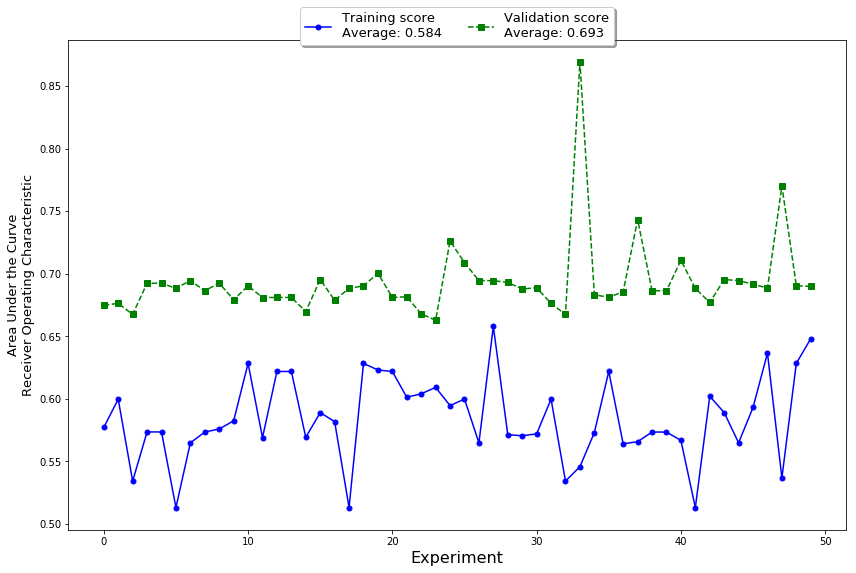

In [21]:
test_results = results['test_score']
train_results = results['train_score']
    
x_coords = np.arange(50)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
axes.plot(
    x_coords, test_results, 
    color='blue', marker='o', markersize=5, 
    label=f'Training score\nAverage: {np.round(np.mean(test_results), 3)}'
)
axes.plot(
    x_coords, train_results, 
    color='green', linestyle='--', marker='s', 
    label=f'Validation score\nAverage: {np.round(np.mean(train_results), 3)}'
)
# Create plot
axes.set_xlabel('Experiment', fontsize=16)
axes.set_ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=13)

plt.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.08),
    ncol=2, 
    fontsize=13,
    fancybox=True, 
    shadow=True
)
plt.tight_layout()
plt.savefig(
    './../../../figures/train_test_dtree_generalized_fisher.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100, 
)